# Generacion de cuentos de Hernan Casciari con Redes Recurrentes

## Obtencion de datos
El sitio web cambio por lo tanto el metodo explicado en el articulo no sirve, se procede a cambiar el metodo para hacer scrapping y obtener los cuentos.

Deprecated: https://www.aprendemachinelearning.com/ejercicio-nlp-cuentos-de-hernan-casciari-python-espanol/

Debido a que el sitio esta renderizado empleando Javascript es necesario emplear Selenium

In [ ]:
from bs4 import BeautifulSoup
import requests
from urllib.request import Request, urlopen
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.chrome.options import Options


In [ ]:
#from tqdm.notebook import tqdm #Colab
from tqdm import tqdm #Local

In [ ]:
root_url = 'https://hernancasciari.com/blog/'

In [ ]:
driver = webdriver.Chrome('C:/Users/crist/Downloads/chromedriver.exe')
driver.get(root_url)
root_url_soup = BeautifulSoup(driver.page_source, 'html.parser')
driver.quit()

In [ ]:
libros_soup = root_url_soup.find_all('article', class_ = 'libro col-sm-6')

In [ ]:
nombre_libros = []
url_libros = []
for libro_soup in tqdm(libros_soup):
    nombre = libro_soup.find('a', class_ = 'enlace titulo').text
    url = 'https://hernancasciari.com' + libro_soup.find('a', class_ = 'enlace titulo')['href']
    nombre_libros.append(nombre)
    url_libros.append(url)

100%|██████████| 10/10 [00:00<00:00, 9974.56it/s]


In [ ]:
nombre_libros

['Renuncio (una antología)',
 'Todos los desechos reservados',
 'Los consejos de mi abuelo facho',
 'El mejor infarto de mi vida',
 'Messi es un perro y otros cuentos',
 'El nuevo paraíso de los tontos',
 'España, decí alpiste',
 'Más respeto que soy tu madre',
 'El pibe que arruinaba las fotos',
 'Charlas con mi hemisferio derecho']

In [ ]:
url_libros

['https://hernancasciari.com/blog/categoria/renuncio',
 'https://hernancasciari.com/blog/categoria/todos_los_desechos_reservados',
 'https://hernancasciari.com/blog/categoria/los_consejos_de_mi_abuelo_facho',
 'https://hernancasciari.com/blog/categoria/el_mejor_infarto_de_mi_vida',
 'https://hernancasciari.com/blog/categoria/messi_es_un_perro_y_otros_cuentos',
 'https://hernancasciari.com/blog/categoria/el_nuevo_paraiso_de_los_tontos',
 'https://hernancasciari.com/blog/categoria/espana_deci_alpiste',
 'https://hernancasciari.com/blog/categoria/mas_respeto_que_soy_tu_madre',
 'https://hernancasciari.com/blog/categoria/el_pibe_que_arruinaba_las_fotos',
 'https://hernancasciari.com/blog/categoria/charlas_con_mi_hemisferio_derecho']

In [ ]:
driver = webdriver.Chrome('C:/Users/crist/Downloads/chromedriver.exe')

driver.get(url_libros[0])

url_libro_soup = BeautifulSoup(driver.page_source, 'html.parser')
driver.quit()

In [ ]:
cuentos_libro = url_libro_soup.find_all('article', class_ = 'tarjeton col-sm-6')

In [ ]:
len(cuentos_libro)

16

In [ ]:
cuentos_libro[0].find('a', class_ = 'enlace titulo').text

'Julieta me ganó seis libros'

In [ ]:
cuentos_libro[0].find('a', class_ = 'enlace titulo')['href']

'/blog/julieta_me_gano_seis_libros'

In [ ]:
url_libros[0]

'https://hernancasciari.com//blog/categoria/renuncio'

In [ ]:
capitulos_url = []

for url_libro in tqdm(url_libros):

    driver = webdriver.Chrome('C:/Users/crist/Downloads/chromedriver.exe')
    driver.get(url_libro)
    url_libro_soup = BeautifulSoup(driver.page_source, 'html.parser')
    driver.quit()
    
    cuentos_libro = url_libro_soup.find_all('article', class_ = 'tarjeton col-sm-6')
    
    time.sleep(0.1)
    
    url_capitulos = []

    for cuento in cuentos_libro:
        
        url = 'https://hernancasciari.com' + cuento.find('a', class_ = 'enlace titulo')['href']
        capitulos_url.append(url)


100%|██████████| 10/10 [00:53<00:00,  5.34s/it]


In [ ]:
len(capitulos_url)

160

In [ ]:
driver = webdriver.Chrome('C:/Users/crist/Downloads/chromedriver.exe')
driver.get(capitulos_url[0])
url_cuento_soup = BeautifulSoup(driver.page_source, 'html.parser')
driver.quit()

In [ ]:
seccion_parrafos = url_cuento_soup.find('section', class_ = 'section-main col-xs-12 col-sm-12 col-md-9 col-lg-9')
parrafos = seccion_parrafos.find_all('p')

textos = []
for parrafo in parrafos:
    textos.append(parrafo.text)
    

In [ ]:
len(textos)

32

In [ ]:
textos = []

for capitulo in tqdm(capitulos_url):
    
    driver = webdriver.Chrome('C:/Users/crist/Downloads/chromedriver.exe')
    driver.get(capitulo)
    url_cuento_soup = BeautifulSoup(driver.page_source, 'html.parser')
    driver.quit()
    
    time.sleep(0.1)
    
    seccion_parrafos = url_cuento_soup.find('section', class_ = 'section-main col-xs-12 col-sm-12 col-md-9 col-lg-9')
    parrafos = seccion_parrafos.find_all('p')
    
    for parrafo in parrafos:
        textos.append(parrafo.text)
    

100%|██████████| 160/160 [15:40<00:00,  5.88s/it]


In [ ]:
len(textos)

4997

In [ ]:
textos[100:105]

['Cuando viajaba a Buenos Aires me encantaba buscar mi apellido en las guías de la Capital, porque tenían tres tomos y millones de abonados. Pero ahí tampoco había ningún Casciari.',
 'En la infancia sentía lo mismo que un astronauta que mira el paisaje terrestre desde su escotilla: una vanidad solitaria y triste.',
 'Entonces un día llegó internet y se destapó el frasco de todos los Casciari del mundo. Estaban mayormente en Italia y en Estados Unidos. Los había de diversas edades, profesiones, color de pelo y condición.',
 'Me gustó la forma de dibujar de James, que hacía viñetas políticas en un diario de Washington; me pareció ejemplar la fuerza de Carla, que se presentaba a las elecciones municipales de Perugia; y me sentí orgulloso de Raymond, que estudiaba la cura del cáncer en Nueva York.',
 'Pero más que nadie me llamó la atención Mauro, un tano de mi edad. Quizás porque era el único que —en aquel internet prehistórico— subía audios y videos de sus programas de radio.']

In [ ]:
Cuentos_Hernan_Casciari = pd.DataFrame(columns=['TEXTOS'])
Cuentos_Hernan_Casciari['TEXTOS'] = textos

In [ ]:
Cuentos_Hernan_Casciari

,TEXTOS
0,"Esta semana leí que, en la ciudad de Buenos Ai..."
1,"Amor a primera vista, intuición, química. A to..."
2,A mí me pasó hace un poco más de tres años. Co...
3,Yo aposté con mis lectores un libro por cada g...
4,Así que los mandé a imprimir en Buenos Aires y...
...,...
4992,"—Una vez, casi. Soñé que sobrevolaba un cement..."
4993,—Sin embargo sigue vivo.
4994,"—Fue el hijo, Carlitos, el que se mató al otro..."
4995,"—¿Supone que va a soñar su propia muerte, cuan..."


In [ ]:
file_name = 'DATA/Cuentos_Hernan_Casciari.csv'
Cuentos_Hernan_Casciari.to_csv(file_name, encoding='utf-8', index= False)

# Creacion del Modelo

In [45]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import time
import re
import unicodedata
import os
from tqdm.notebook import tqdm #Colab

import tensorflow as tf
from tensorflow.keras.utils import plot_model

##Preparacion de los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DIPLOMADO INTELIGENCIA ARTIFICIAL/TAREAS/9. RETOS/5. Generacion de texto/DATA/Cuentos_Hernan_Casciari.csv')
data

,TEXTOS
0,"Esta semana leí que, en la ciudad de Buenos Ai..."
1,"Amor a primera vista, intuición, química. A to..."
2,A mí me pasó hace un poco más de tres años. Co...
3,Yo aposté con mis lectores un libro por cada g...
4,Así que los mandé a imprimir en Buenos Aires y...
...,...
4992,"—Una vez, casi. Soñé que sobrevolaba un cement..."
4993,—Sin embargo sigue vivo.
4994,"—Fue el hijo, Carlitos, el que se mató al otro..."
4995,"—¿Supone que va a soñar su propia muerte, cuan..."


In [ ]:
corpus = data['TEXTOS'].values.tolist()

Se separan los textos por los puntos para que las oraciones no queden tan largas

In [ ]:
corpus_splitted = []

for sentence in tqdm(corpus):
  sentences = re.split('([\.]|[\,]|[\;]|[\:])',sentence.lower())
  corpus_splitted.extend(sentences)

### Limpieza de los datos

Se eliminan las tildes y demas caracteres que no sean letras

In [ ]:
corpus_clean = []

for sentence in tqdm(corpus_splitted):

  s1 = sentence.replace("ñ", "#")
  s2 = unicodedata.normalize("NFKD", s1).encode("ascii","ignore").decode("ascii").replace("#", "ñ")

  sentences = re.sub(r'[^a-zA-Z  ñ]+', '', s2)
  sentences = sentences.lstrip().rstrip()

  if sentences != '':
    corpus_clean.append(sentences)


In [ ]:
corpus_ready = []

for sentence in tqdm(corpus_clean):
  longitud = len(sentence.split())
  if longitud > 1 and longitud < 17:
    corpus_ready.append(sentence)


In [ ]:
len(corpus_ready)

25703

In [ ]:
corpus_ready[100:120]

['a lo largo de mi vida conoci a un monton de gente mientras yo estaba drogado',
 'y nunca mi cabeza se fue al futuro ni se ligo la conversacion con mi vejez',
 'nunca escuche ay',
 'que jovenes que eran el dia que lo conoci a andy en un bar',
 'esto que cuento me paso una sola vez en la vida',
 'despues de la copa america de',
 'algunos lo llaman amor a primera vista',
 'otros le dicen quimica',
 'y en barcelona no podia dejar de pensar en ella',
 'empezamos a hablar por wasap',
 'y ahi supe que era antisocial como yo',
 'y que era hincha de racing',
 'y crei todavia mas en el viejo del futuro',
 'entonces viaje a buenos aires para su cumpleaños',
 'ella iba a cumplir',
 'en diciembre de',
 'y yo vole unos dias antes',
 'y la invite a montevideo a pasar un fin de semana',
 'nos habiamos visto muy pocas veces',
 'no podia salir bien']

In [ ]:
del corpus
del corpus_splitted
del corpus_clean

### Tokenizado

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus_ready)

In [ ]:
total_words = len(tokenizer.word_index) + 1
print('Numero de palabras en el corpus: ' + str(total_words))
print('Indice de (hola): ',tokenizer.word_index['hola'])
print('Indice de (casa): ',tokenizer.word_index['casa'])

Numero de palabras en el corpus: 17603
Indice de (hola):  1789
Indice de (casa):  49


### Creacion de las secuencias de entrada y salida para el modelo

In [ ]:
input_sequences = []
for line in corpus_ready:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)
        
print('input_sequences[0:10] = ',input_sequences[:10],'\n')

# Determine longest n-gram
max_seq_test_len = max([len(x) for x in input_sequences])
print('\nlong. n-grama más largo:',max_seq_test_len)

input_sequences[0:10] =  [[33, 186], [33, 186, 1126], [33, 186, 1126, 2], [6, 3], [6, 3, 456], [6, 3, 456, 1], [6, 3, 456, 1, 289], [6, 3, 456, 1, 289, 341], [5, 1], [5, 1, 10]] 


long. n-grama más largo: 16


In [ ]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = to_categorical(label, num_classes=total_words)

In [ ]:
predictors[0:1]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 33]],
      dtype=int32)

In [ ]:
label[0:1].shape

(1, 17603)

# MODELO MK01

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 15, 100)           1760300   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 15, 300)           301200    
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 300)           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_6 (Dense)              (None, 8801)              888901    
_________________________________________________________________
dense_7 (Dense)              (None, 17603)             154941606 
Total params: 158,052,407
Trainable params: 158,052,407
Non-trainable params: 0
________________________________________

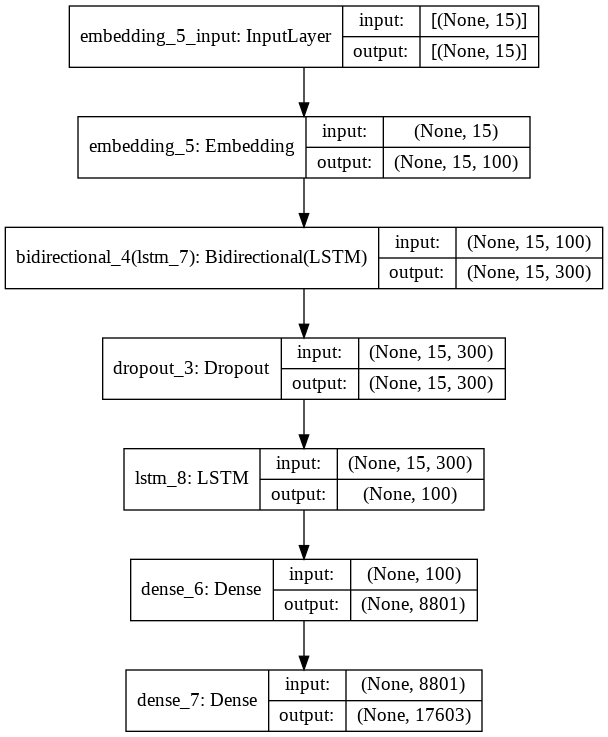

In [ ]:
print(model.summary())
plot_model(model, to_file='../Genrador_de_texto.png', 
           show_shapes=True)

In [ ]:
# prepare model saving directory.
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'generador_text_mk01.{epoch:03d}.h5'
if not os.path.isdir(save_dir):
        os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

# reduce learning rate by sqrt(0.1) if the loss does not improve in 5 epochs
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               monitor='loss',
                               cooldown=0,
                               patience=5,
                               verbose=1,
                               min_lr=0.5e-6)

# save weights for future use (e.g. reload parameters w/o training)
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='loss',
                             verbose=1,
                             save_best_only=True)


# called every epoch
callbacks = [lr_reducer, checkpoint]

In [43]:
history = model.fit(predictors, label, epochs=100, callbacks=callbacks, verbose=1)

Epoch 1/100
4711/4711 [==============================] - 163s 34ms/step - loss: 7.2315 - accuracy: 0.0472

Epoch 00001: loss improved from inf to 7.05665, saving model to /content/saved_models/generador_text_mk01.001.h5
Epoch 2/100
4711/4711 [==============================] - 159s 34ms/step - loss: 6.5605 - accuracy: 0.0775

Epoch 00002: loss improved from 7.05665 to 6.51905, saving model to /content/saved_models/generador_text_mk01.002.h5
Epoch 3/100
4711/4711 [==============================] - 159s 34ms/step - loss: 6.2281 - accuracy: 0.0936

Epoch 00003: loss improved from 6.51905 to 6.21365, saving model to /content/saved_models/generador_text_mk01.003.h5
Epoch 4/100
4711/4711 [==============================] - 159s 34ms/step - loss: 6.0148 - accuracy: 0.1027

Epoch 00004: loss improved from 6.21365 to 6.00919, saving model to /content/saved_models/generador_text_mk01.004.h5
Epoch 5/100
4711/4711 [==============================] - 159s 34ms/step - loss: 5.8177 - accuracy: 0.1171

E

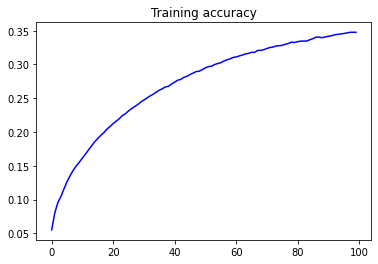

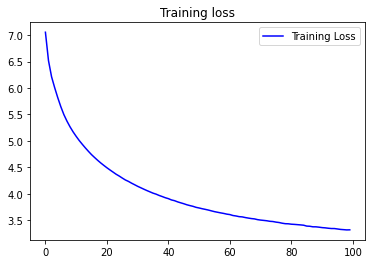

In [47]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

## PRUEBA DEL MODELO
## GENERACION DE TEXTO

In [50]:
def generate_text_from_model(seed_text, model, tokenizer, next_words = 100):

  for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

  return seed_text

In [59]:
seed_text = "y entonces la vi a ella"

output_text = generate_text_from_model(seed_text, model, tokenizer)

print('Texto de salida:')
print(output_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Texto de salida:
y entonces la vi a ella y me resultaba rara italia me dijo islamico en sudafrica a cualquiera de mis primas y lo capto despertaron la salud comun y me dejaban llevar a carcajadas de que no aparece comequechu a punto de perugia extranjero toc a medias encanutando las marcas de productos llamadas locales con ocho años y despues carolina presentaba su boca con las cabalas blandas de su hija defiende a la parroquia que no dormia danza increibles para siempre nosotros mismos baches sino que vuelva a sandra los peores que nos pasan los neologismos depre y los persigue mucho una seda saludables y limpia


In [57]:
seed_text = "dime por que eres tan cruel?"

output_text = generate_text_from_model(seed_text, model, tokenizer)

print('Texto de salida:')
print(output_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Texto de salida:
dime por que eres tan cruel? el vocablo volvio a buscar nuestras hazañas jardiel poncela ambulante ni cantar desbocada milano merda menor de teatro habitual proporcional al termo con agua caliente demasiado encima alta pilsen soltera al mismo tiempo hermosa gracia del puente inicial del barca de conjunto con sus caseros sino ecologica cientifico aguinaldo cientifico xvi que venian al oido divertidos de carolina variantes que cambiaba la pelota de mercedes que no ocurrira como natacion sincronizada o limpia estudiar hasta reloj ni yo entendimos que mauro se enoja con el mismo autor femenina y fingia compartir la placita del hospital un poco para recibirlo peor


# MODELO MK02
Mas unidades a las capas LSTM +
Otra capa Bidireccional

In [67]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(256, return_sequences = True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(256, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 15, 100)           1760300   
_________________________________________________________________
bidirectional_8 (Bidirection (None, 15, 512)           731136    
_________________________________________________________________
dropout_7 (Dropout)          (None, 15, 512)           0         
_________________________________________________________________
bidirectional_9 (Bidirection (None, 15, 512)           1574912   
_________________________________________________________________
dropout_8 (Dropout)          (None, 15, 512)           0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 128)               328192    
_________________________________________________________________
dense_12 (Dense)             (None, 8801)             

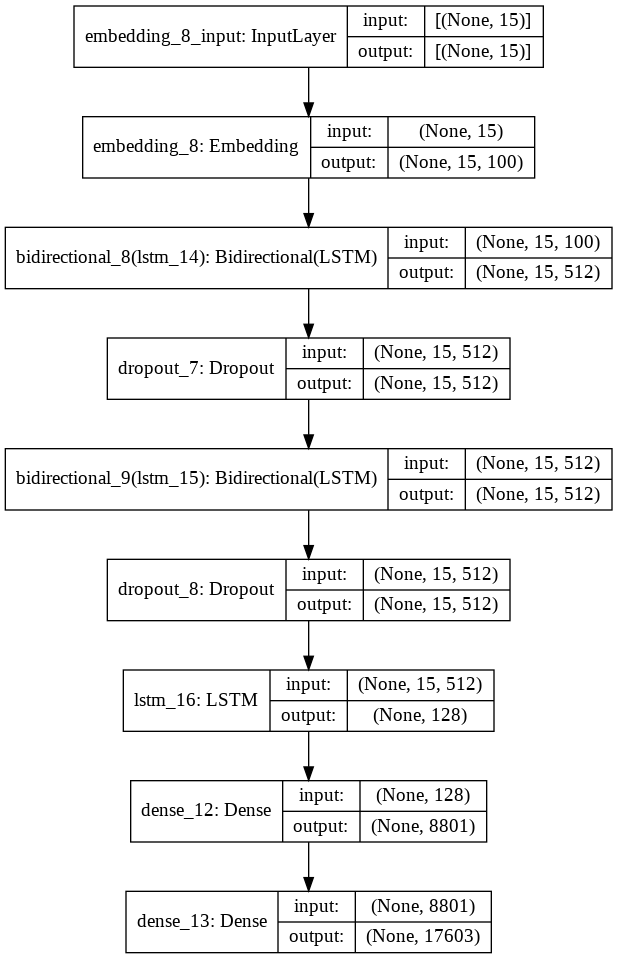

In [64]:
print(model.summary())
plot_model(model, to_file='../Genrador_de_texto.png', 
           show_shapes=True)

In [65]:
# prepare model saving directory.
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'generador_text_mk02.{epoch:03d}.h5'
if not os.path.isdir(save_dir):
        os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

# reduce learning rate by sqrt(0.1) if the loss does not improve in 5 epochs
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               monitor='loss',
                               cooldown=0,
                               patience=2,
                               verbose=1,
                               min_lr=0.5e-6)

# save weights for future use (e.g. reload parameters w/o training)
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='loss',
                             verbose=1,
                             save_best_only=True)


# called every epoch
callbacks = [lr_reducer, checkpoint]

In [69]:
history = model.fit(predictors, label, epochs=100, callbacks=callbacks, verbose=1)

Epoch 1/100
4711/4711 [==============================] - 192s 40ms/step - loss: 7.2439 - accuracy: 0.0501

Epoch 00001: loss did not improve from 7.03095
Epoch 2/100
4711/4711 [==============================] - 187s 40ms/step - loss: 6.5485 - accuracy: 0.0743

Epoch 00002: loss improved from 7.03095 to 6.54380, saving model to /content/saved_models/generador_text_mk02.002.h5
Epoch 3/100
4711/4711 [==============================] - 186s 39ms/step - loss: 6.3120 - accuracy: 0.0854

Epoch 00003: loss improved from 6.54380 to 6.29624, saving model to /content/saved_models/generador_text_mk02.003.h5
Epoch 4/100
4711/4711 [==============================] - 184s 39ms/step - loss: 6.1361 - accuracy: 0.0964

Epoch 00004: loss improved from 6.29624 to 6.14301, saving model to /content/saved_models/generador_text_mk02.004.h5
Epoch 5/100
4711/4711 [==============================] - 184s 39ms/step - loss: 6.0116 - accuracy: 0.1007

Epoch 00005: loss improved from 6.14301 to 6.02902, saving model to

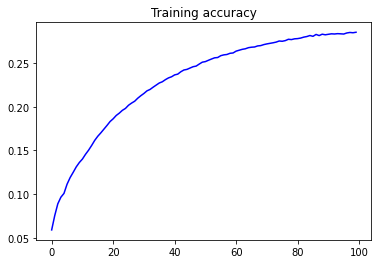

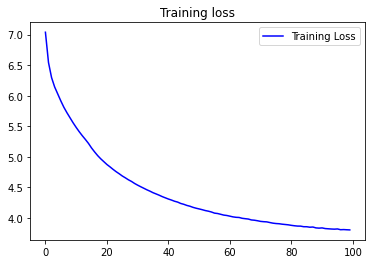

In [70]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

## PRUEBA DEL MODELO
## GENERACION DE TEXTO

In [71]:
seed_text = "y ahora con que pendajada vas a salir"

output_text = generate_text_from_model(seed_text, model, tokenizer)

print('Texto de salida:')
print(output_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Texto de salida:
y ahora con que pendajada vas a salir de casa un poco a mitad de la luna privada detras kilo de pereza envuelto en serio alrededor de la izquierda familiares de contacto humana images santa cruz de cochabamba de infantes rosa juntos toda la mañana que te meta todo colorado cuantas libros cambian que se me ganara a presentar un libro de humo dijo que fuera solos de barcelona y media seleccion de sudamericana nuevas tramas de hombres que venian demasiado acrobacias comunes en la vida derecha sucia de barcelona y siquiera estaria feos ni nos quedamos toda la luna sino caliente para huespedes con cajones flacos alentaban


In [72]:
seed_text = "Erase una vez"

output_text = generate_text_from_model(seed_text, model, tokenizer)

print('Texto de salida:')
print(output_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Texto de salida:
Erase una vez que no se le ocurrio la libertad a mitad a buenos aires como arma olimpicos de fotografias de tita italia italia repite diego querer mucho tiempo alrededor de la mañana verdadero cuenta que fuera muy graciosos mientras venian con gestos digitales para decirle que venian la mano pero ahora mismo me ganara hacerla bloguero a motor de encima de italia italia de provincia y temprano contaria mas cuidado del jesus colgado en un momento especial y un detalle contaria mucho que no era un detalle sin gracia que natacion sincronizada o danza simples que horribles y negro mientras me persigue
